### DATOS INICIALES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definiciones Utiles
AU = 1.496 * (10**(11)) #m
KM = 1000 #m

# Radios Orbitales
RADIO_ORBITAL_SATURNO = 9.54 * AU
RADIO_ORBITAL_JUPITER = 5.20 * AU
RADIO_ORBITAL_TIERRA = 1.0 * AU

# Radios
RADIO_SATURNO = 58200 * KM
RADIO_JUPITER = 71500 * KM
RADIO_TIERRA = 6378 * KM

# Parametros de Masa
U_SATURNO = 3.79312 * (10**(16))
U_JUPITER = 1.26687 * (10**(17))
U_TIERRA = 3.986 * (10**(14))
U_SOL = 1.32712 * (10**(20))

Excentricidad_alrededor_sol_inicial = 1.1
Radio_Perihelio_sol_inicial = 1.2 * AU

Distancia_minima_con_saturno = 10**(5) * KM

2a)

In [3]:
v_infinito_orbita_saturno = np.sqrt(((Excentricidad_alrededor_sol_inicial-1)*U_SOL)/Radio_Perihelio_sol_inicial)
print(f"v_infinito_orbita_saturno: {v_infinito_orbita_saturno} m/s")
v_entrada_SOI_saturno = np.sqrt(
    (v_infinito_orbita_saturno**2)
    + 2 * (U_SOL/RADIO_ORBITAL_SATURNO)
)
print(f"v_entrada_SOI_saturno: {v_entrada_SOI_saturno} m/s")

h_orbital_saturno = np.sqrt(Radio_Perihelio_sol_inicial*(1+Excentricidad_alrededor_sol_inicial)*U_SOL)
print(f"h_orbital_saturno: {h_orbital_saturno}")

anomalia_verdadera_en_saturno = np.rad2deg(np.arccos((h_orbital_saturno**2/(U_SOL*RADIO_ORBITAL_SATURNO) - 1)/Excentricidad_alrededor_sol_inicial))
print(f"anomalia_verdadera_en_saturno: {anomalia_verdadera_en_saturno}")

v_sat_SOI_r = v_entrada_SOI_saturno * np.cos(np.deg2rad(anomalia_verdadera_en_saturno))
v_sat_SOI_o = v_entrada_SOI_saturno * np.sin(np.deg2rad(anomalia_verdadera_en_saturno))

VELOCIDAD_ORBITAL_SATURNO = np.sqrt(U_SOL/RADIO_ORBITAL_SATURNO)

print(VELOCIDAD_ORBITAL_SATURNO)
v_sat_SOI_o -= VELOCIDAD_ORBITAL_SATURNO
print(f"v_sat_SOI_r: {v_sat_SOI_r} m/s")
print(f"v_sat_SOI_o: {v_sat_SOI_o} m/s")

v_sat_SOI = np.sqrt(v_sat_SOI_o**2 + v_sat_SOI_r**2)

v_infinito_orbita_saturno: 8598.02447981144 m/s
v_entrada_SOI_saturno: 16121.521213178852 m/s
h_orbital_saturno: 7073285114004666.0
anomalia_verdadera_en_saturno: 131.9863612057179
9643.065416959977
v_sat_SOI_r: -10784.551068850345 m/s
v_sat_SOI_o: 2340.127165583901 m/s


2b)

In [4]:
Excentricidad_alrededor_de_saturno = 1 + ((v_sat_SOI**2) * Distancia_minima_con_saturno)/U_SATURNO
print(f"Excentricidad_alrededor_de_saturno: {Excentricidad_alrededor_de_saturno}")

a_alrededor_de_saturno = U_SATURNO/(v_sat_SOI**2)
print(f"a_alrededor_de_saturno: {a_alrededor_de_saturno} KM or {a_alrededor_de_saturno/AU} AU")

Excentricidad_alrededor_de_saturno: 1.3210621781218228
a_alrededor_de_saturno: 311466148.3485491 KM or 0.0020819929702443124 AU


2c)

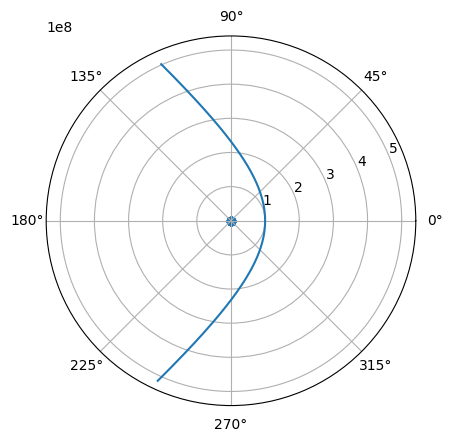

In [5]:
theta = np.arange(-2, 2, 0.01)
r = (a_alrededor_de_saturno*(Excentricidad_alrededor_de_saturno**2 - 1))/(1+Excentricidad_alrededor_de_saturno*np.cos(theta))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.scatter(np.arange(0, 2*np.pi), [0 for _ in np.arange(0, 2*np.pi)])

In [6]:
ANGULO_DE_GIRO = np.arccos(1/Excentricidad_alrededor_de_saturno) + np.arctan(v_sat_SOI_r/v_sat_SOI_o)

print(f"ANGULO_DE_GIRO: {np.rad2deg(ANGULO_DE_GIRO)} degrees")

ANGULO_DE_GIRO: -36.95475586576217 degrees


In [7]:
x = r*np.cos(theta)
y = r*np.sin(theta)
xy = np.array([x, y])
matrix = np.array([[np.cos(ANGULO_DE_GIRO), -np.sin(ANGULO_DE_GIRO)], [np.sin(ANGULO_DE_GIRO), np.cos(ANGULO_DE_GIRO)]])
hipergir = np.matmul(matrix, xy)

In [8]:
np.arctan(np.deg2rad(90-180))

-1.0038848218538872

In [9]:
linea_orbital_saturno = lambda x: (-1/(np.arctan(np.deg2rad(anomalia_verdadera_en_saturno))))*x
linea_heliocentrica_saturno = lambda x: (np.arctan(np.deg2rad(anomalia_verdadera_en_saturno)))*x
x_points = np.arange(-2E15, 2E15, 0.01*2E15)

(-300000000.0, 300000000.0)

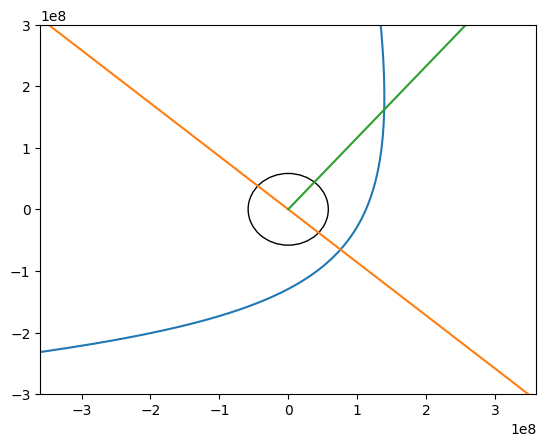

In [10]:
fig, ax = plt.subplots()
ax.plot(hipergir[0], hipergir[1])
Drawing_uncolored_circle = plt.Circle( xy=(0.0, 0.0), radius=RADIO_SATURNO, fill = False )
ax.plot(x_points, linea_orbital_saturno(x_points))
ax.plot(np.arange(0, 2E15, 0.01*2E15), linea_heliocentrica_saturno(np.arange(0, 2E15, 0.01*2E15)))
ax.add_artist( Drawing_uncolored_circle )
plt.xlim(-3.6E8, 3.6E8)
plt.ylim(-3E8, 3E8)

2d)

In [11]:
ANGULO_DE_GIRO = 2*np.arcsin(1/Excentricidad_alrededor_de_saturno)
Matriz_de_giro = np.array([[np.cos(ANGULO_DE_GIRO), -np.sin(ANGULO_DE_GIRO)], [np.sin(ANGULO_DE_GIRO), np.cos(ANGULO_DE_GIRO)]])
vinfneg = np.array([v_sat_SOI_r, v_sat_SOI_o])
vinfpos = np.matmul(Matriz_de_giro, vinfneg)
print(f"vinfpos: {vinfpos} m/s")

v_heliocentrica = vinfpos + np.array([0, VELOCIDAD_ORBITAL_SATURNO])
print(f"v_heliocentrica: {v_heliocentrica} m/s")

vinfpos: [  -740.54076333 -11010.64649717] m/s
v_heliocentrica: [ -740.54076333 -1367.58108021] m/s


2e)

In [12]:
V_H = np.sqrt(v_heliocentrica[0]**2 + v_heliocentrica[1]**2)
a_cometa_salida_saturno = ((2/RADIO_ORBITAL_SATURNO) - ( V_H**2 / U_SOL))**(-1)
print(f"a_cometa_salida_saturno: {a_cometa_salida_saturno} m")

Excentricidad_alrededor_sol_despues_saturno = RADIO_ORBITAL_SATURNO/a_cometa_salida_saturno - 1 
print(f"Excentricidad_alrededor_sol_despues_saturno: {Excentricidad_alrededor_sol_despues_saturno} m")

h_orbital_solar_despues_saturno = RADIO_ORBITAL_SATURNO*V_H
print(f"h_orbital_solar_despues_saturno: {h_orbital_solar_despues_saturno} m^2/s")

a_cometa_salida_saturno: 722994710534.7109 m
Excentricidad_alrededor_sol_despues_saturno: 0.9739895454345522 m
h_orbital_solar_despues_saturno: 2219571053008568.5 m^2/s


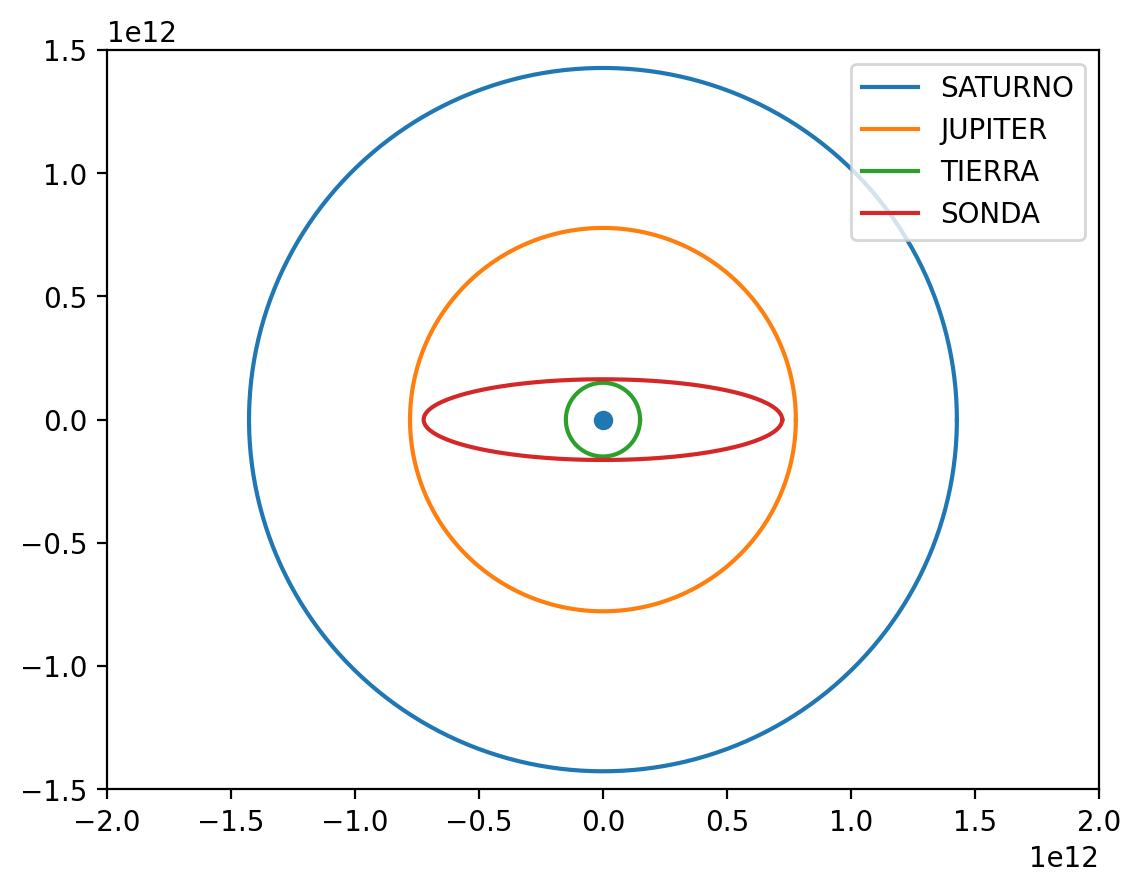

In [13]:
fig, ax = plt.subplots(dpi=200)
def polar_grafic(a, b, label="", angle=0):
    global fig, ax
    theta = np.arange(0, (2 * np.pi), 0.01)
    r = (a*b)/np.sqrt((a*np.sin(theta))**2 + (b*np.cos(theta))**2)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xy = np.array([x, y])
    matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    xy_gir = np.matmul(matrix, xy)
    ax.plot(xy_gir[0], xy_gir[1], label=label)
    plt.xlim(-2E12, 2E12)
    plt.ylim(-1.5E12, 1.5E12)
polar_grafic(a=RADIO_ORBITAL_SATURNO, b=RADIO_ORBITAL_SATURNO, label="SATURNO")
polar_grafic(a=RADIO_ORBITAL_JUPITER, b=RADIO_ORBITAL_JUPITER, label="JUPITER")
polar_grafic(a=RADIO_ORBITAL_TIERRA, b=RADIO_ORBITAL_TIERRA, label="TIERRA")
ax.scatter(x=0, y=0)
polar_grafic(a=a_cometa_salida_saturno, b=np.sqrt(a_cometa_salida_saturno**2 - (Excentricidad_alrededor_sol_despues_saturno*a_cometa_salida_saturno)**2), label="SONDA")
plt.legend(loc='upper right')
plt.show()

# 3

3a)

In [55]:
velocidad_cometa_entrada_orbita_jupiter = np.sqrt(U_SOL * ((2/RADIO_ORBITAL_JUPITER) - (1/a_cometa_salida_saturno)))
print(f"velocidad_cometa_entrada_orbita_jupiter: {velocidad_cometa_entrada_orbita_jupiter} m/s")

anomalia_verdadera_en_jupiter_entrada = np.arccos( (1/Excentricidad_alrededor_sol_despues_saturno)*((h_orbital_solar_despues_saturno**2)/(U_SOL*RADIO_ORBITAL_JUPITER)-1) )
print(f"anomalia_verdadera_en_jupiter_entrada: {np.rad2deg(anomalia_verdadera_en_jupiter_entrada)} degrees")

v_heliocentrica_entrada_jupiter_respecto_sol = velocidad_cometa_entrada_orbita_jupiter * np.array([np.cos(anomalia_verdadera_en_jupiter_entrada), np.sin(anomalia_verdadera_en_jupiter_entrada)])
print(f"v_heliocentrica_entrada_jupiter_respecto_sol: {v_heliocentrica_entrada_jupiter_respecto_sol} m/s")

VELOCIDAD_ORBITAL_JUPITER = np.sqrt(U_SOL/RADIO_ORBITAL_JUPITER)
v_entrada_SOI_jupiter = v_heliocentrica_entrada_jupiter_respecto_sol + np.array([0, VELOCIDAD_ORBITAL_JUPITER])
v_entrada_SOI_jupiter[1] = - v_entrada_SOI_jupiter[1]
print(f"v_entrada_SOI_jupiter: {v_entrada_SOI_jupiter} m/s")

velocidad_cometa_entrada_orbita_jupiter: 12555.409018324097 m/s
anomalia_verdadera_en_jupiter_entrada: 167.8804188958963 degrees
v_heliocentrica_entrada_jupiter_respecto_sol: [-12275.56830575   2636.04218258] m/s
v_entrada_SOI_jupiter: [-12275.56830575 -15697.37898736] m/s


In [56]:
a_alrededor_de_jupiter = U_JUPITER/(v_entrada_SOI_jupiter[0]**2 + v_entrada_SOI_jupiter[1]**2)
print(f"a_alrededor_de_jupiter: {a_alrededor_de_jupiter} m")

a_alrededor_de_jupiter: 319032652.7232199 m


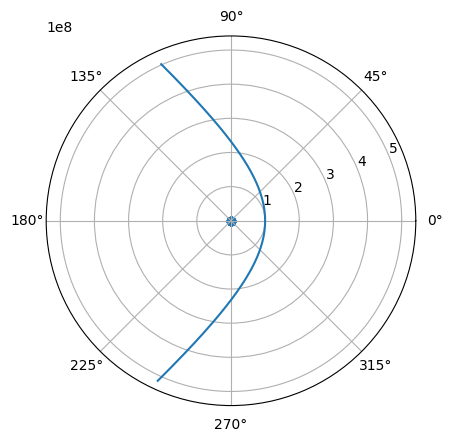

In [57]:
theta = np.arange(-2, 2, 0.01)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(theta, r)
ax.scatter(np.arange(0, 2*np.pi), [0 for _ in np.arange(0, 2*np.pi)])

3b)

In [73]:
d_range = np.arange(2*RADIO_JUPITER, 40*RADIO_JUPITER, step=0.2*RADIO_JUPITER)
excentricidad_alrededor_de_jupiter = lambda rpi: 1 + (np.linalg.norm(v_entrada_SOI_jupiter)**2 * rpi)/ U_JUPITER
rpis = []
es = []

In [74]:
for d in d_range:
    e = excentricidad_alrededor_de_jupiter(d)
    angulo_giro_jupiter = 2*np.arcsin(1/e)
    Matriz_de_giro = np.array([[np.cos(angulo_giro_jupiter), -np.sin(angulo_giro_jupiter)], [np.sin(angulo_giro_jupiter), np.cos(angulo_giro_jupiter)]])
    vinfneg = np.array([v_entrada_SOI_jupiter[0], v_entrada_SOI_jupiter[1]])
    vinfpos = np.matmul(Matriz_de_giro, vinfneg)
    vinfpos -= np.array([0, VELOCIDAD_ORBITAL_JUPITER])
    a = U_SOL/np.linalg.norm(vinfpos)
    h = vinfpos[1] * RADIO_JUPITER
    excentricidad_alrededor_sol = np.sqrt(1-(h**2)/(U_SOL*a))
    es.append(excentricidad_alrededor_sol)
    rpis.append(a*(1-excentricidad_alrededor_sol))
    print(e, angulo_giro_jupiter, vinfpos, a, h, excentricidad_alrededor_sol)

1.448229981412157 1.5243547901268468 [ 15110.56250253 -26052.41778979] 4406489784315795.0 -1862747871969.9695 0.9999999999970333
1.4930529795533727 1.4677942393459544 [ 14352.00789103 -26885.84959177] 4354540176004822.0 -1922338245811.289 0.9999999999968027
1.5378759776945885 1.415820319606493 [ 13614.43712241 -27612.77611991] 4310698502322730.5 -1974313492573.543 0.9999999999965932
1.5826989758358043 1.36782921115904 [ 12900.6904397  -28249.14344303] 4273386314610326.5 -2019813756176.4883 0.9999999999964032
1.62752197397702 1.3233292133695504 [ 12212.28492973 -28807.99934314] 4241405687819597.5 -2059771953034.6838 0.9999999999962313
1.6723449721182355 1.2819139438466747 [ 11549.84716337 -29300.12724018] 4213830201282001.5 -2094959097672.7068 0.9999999999960759
1.7171679702594513 1.2432432751963605 [ 10913.40391577 -29734.51584398] 4189931743468440.5 -2126017882844.428 0.9999999999959357
1.7619909684006672 1.2070294291710342 [ 10302.58057386 -30118.71403051] 4169129997720853.5 -2153488

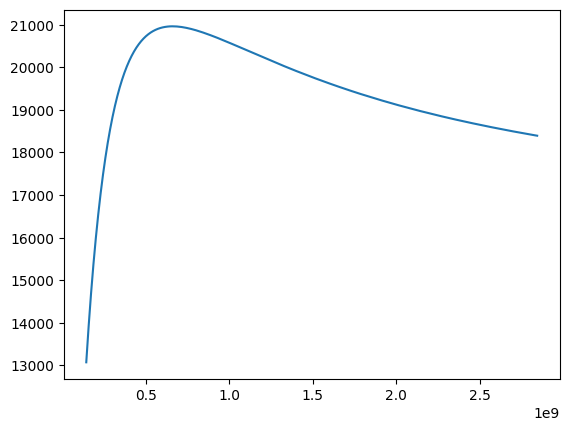

In [76]:
plt.plot(d_range, np.array(rpis))